<a href="https://colab.research.google.com/github/ARJUNVIJAYMK/ML-DL_assignment/blob/my_sql_assignment/ARJUNVIJAY_DL_CNN_for_Fashion_MNIST__Classification_TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT LIBRARY**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# **READ CSV FILE**

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

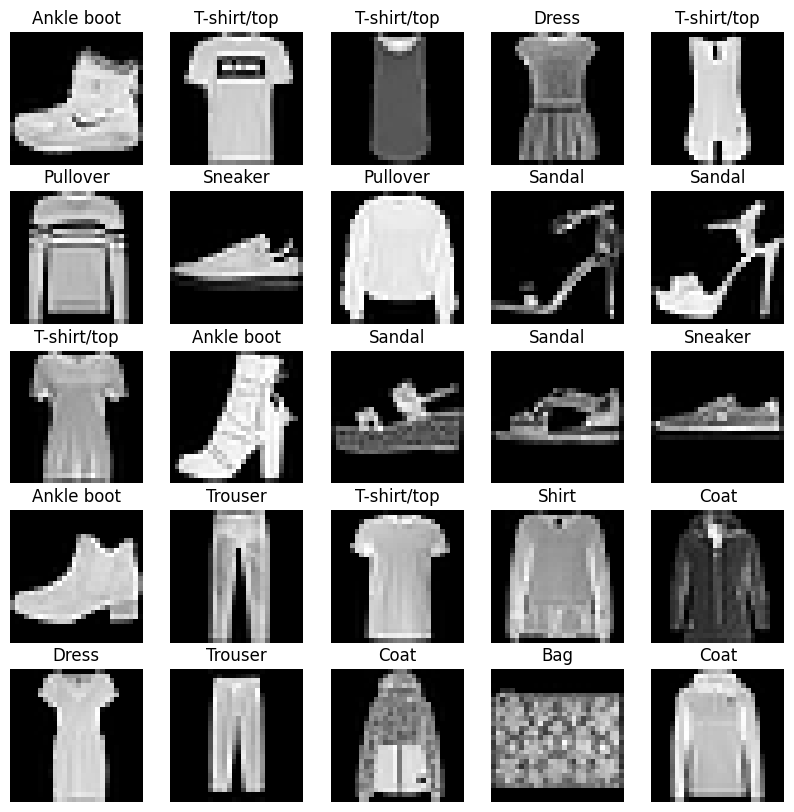

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# **CREATE MLP MODEL**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


EVALUATE THE MODLE

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 58s 38ms/step - loss: 0.4712 - accuracy: 0.8315 - val_loss: 0.3539 - val_accuracy: 0.8708
Epoch 2/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3135 - accuracy: 0.8856 - val_loss: 0.3030 - val_accuracy: 0.8927
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2686 - accuracy: 0.9016 - val_loss: 0.2707 - val_accuracy: 0.9007
Epoch 4/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2341 - accuracy: 0.9116 - val_loss: 0.2591 - val_accuracy: 0.9060
Epoch 5/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2053 - accuracy: 0.9235 - val_loss: 0.2628 - val_accuracy: 0.9065
Epoch 6/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1851 - accuracy: 0.9304 - val_loss: 0.2548 - val_accuracy: 0.9087
Epoch 7/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1616 - accuracy: 0.9394 - val_loss: 0.2491 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

NameError: name 'x_test' is not defined

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


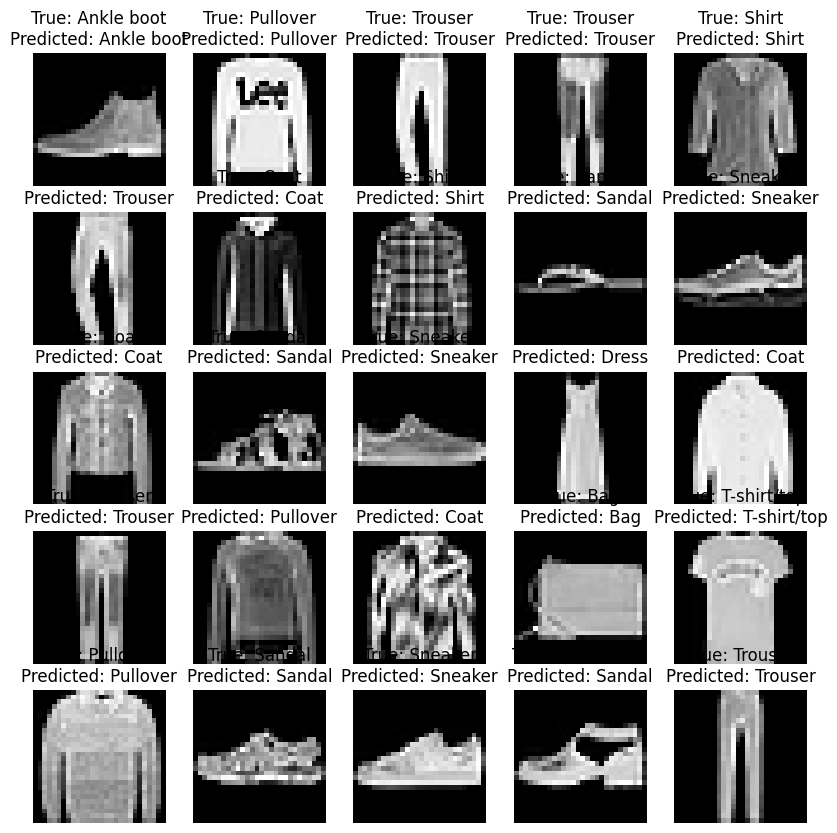

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}")
    plt.axis('off')
plt.show()
